<a href="https://colab.research.google.com/github/jideilori/hamoye-ds/blob/master/stage_c_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [37]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [38]:
#  Drop stab
df2= df.drop(columns=['stab'])
df2.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [39]:
X = df2.drop(columns=['stabf'])
y = df2['stabf']
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [40]:
y.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [41]:
# df_stable = df2[df2.stabf== 'stable' ]
# df_unstable = df2[df2.stabf== 'unstable' ].sample(3650 )
# data_df = df_stable.append(df_unstable) 
data_df=df2
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [42]:
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [43]:
data_df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [44]:
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df)
data_df = data_df.reset_index(drop= True )
data_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,0.725654,2.973767,6.285106,7.985003,3.960461,-1.288232,-1.906866,-0.765362,0.634127,0.696596,0.971073,0.284494,unstable
1,4.529769,3.445857,3.998585,7.756557,5.292864,-1.969556,-1.834291,-1.489017,0.620844,0.057813,0.261780,0.773736,unstable
2,6.637130,6.403878,6.591696,3.270969,3.431955,-1.110138,-1.215881,-1.105936,0.266927,0.158837,0.581945,0.282121,unstable
3,8.693986,2.911455,8.215801,8.986732,4.575044,-1.257642,-1.515097,-1.802305,0.546485,0.866088,0.188790,0.397385,unstable
4,1.185193,5.077444,1.255236,7.122997,4.714910,-1.808397,-1.614971,-1.291542,0.461862,0.620192,0.056897,0.265261,stable


In [45]:
X = data_df.drop(columns=['stabf'])
y = data_df.stabf
print(type(X),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [46]:
y.head()

0    unstable
1    unstable
2    unstable
3    unstable
4      stable
Name: stabf, dtype: object

In [47]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.725654,2.973767,6.285106,7.985003,3.960461,-1.288232,-1.906866,-0.765362,0.634127,0.696596,0.971073,0.284494
1,4.529769,3.445857,3.998585,7.756557,5.292864,-1.969556,-1.834291,-1.489017,0.620844,0.057813,0.261780,0.773736
2,6.637130,6.403878,6.591696,3.270969,3.431955,-1.110138,-1.215881,-1.105936,0.266927,0.158837,0.581945,0.282121
3,8.693986,2.911455,8.215801,8.986732,4.575044,-1.257642,-1.515097,-1.802305,0.546485,0.866088,0.188790,0.397385
4,1.185193,5.077444,1.255236,7.122997,4.714910,-1.808397,-1.614971,-1.291542,0.461862,0.620192,0.056897,0.265261


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )

In [49]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(8000, 12) (8000,)
(2000, 12) (2000,)


In [50]:
y_train_df = pd.DataFrame(y_train)
y_train_df.stabf.value_counts()

unstable    5091
stable      2909
Name: stabf, dtype: int64

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_train_df = scaler.fit_transform(x_train)
norm_train_df = pd.DataFrame(norm_train_df,columns = x_train.columns)
norm_train_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.132073,0.204850,-0.000684,1.056347,0.496864,0.336222,0.010014,-1.208892,-0.537228,0.973845,0.516501,-1.440343
1,-0.679427,-0.543374,-0.941047,-1.021763,0.501958,0.730701,-0.374936,-1.225590,-0.258522,-1.354206,0.473112,1.119927
2,-0.279714,0.996872,0.403216,-0.541913,0.661138,-1.106986,1.365901,-1.412830,-0.674913,0.264992,1.608523,-1.524571
3,-1.049092,0.817899,1.584578,0.350927,-0.364026,0.560606,0.088249,-0.016457,-0.278435,0.364043,-1.588154,0.205458
4,-0.872540,-1.203829,-0.778393,0.896574,-0.259795,1.031991,-0.464577,-0.113709,-1.448130,0.121653,1.544992,0.821700


In [52]:
norm_test_df = scaler.transform(x_test)
norm_test_df = pd.DataFrame(norm_test_df,columns = x_train.columns)
norm_test_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,-0.407084,-1.021619,-1.434018,1.546486,0.249857,-0.508980,-1.193830,1.272566,1.003138,1.155323,1.437039,0.983223
1,0.486726,-0.102937,0.060361,-1.009855,-1.218634,1.727247,1.569198,-1.183936,-1.286761,-0.319348,0.872399,-1.197534
2,1.337639,0.891140,1.592437,-0.281144,0.734986,-0.641916,-0.698882,0.066188,0.926767,1.509004,-1.500563,0.979034
3,0.512438,-0.542425,0.838779,-0.301743,0.616704,-0.268880,0.645481,-1.450118,-0.523745,1.599467,-1.398274,-0.798858
4,-0.817696,-1.036013,0.239625,1.227158,-0.629153,-0.762992,1.087392,0.763833,1.111430,0.734408,-0.134848,-1.416968


# Random Forest Classifier

In [53]:
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier()
# rfc.fit(norm_train_df, y_train)
# rfc_pred = rfc.predict(norm_test_df)

In [54]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [55]:
# from sklearn.model_selection import RandomizedSearchCV
# clf = RandomizedSearchCV(rfc, hyperparameter_grid, random_state=1)
# search = clf.fit(norm_train_df, y_train)
# search.best_params_.values()

In [56]:
# #experimenting with this parameter to test the model's performance
# rfc_param = RandomForestClassifier(n_estimators=1000, min_samples_split=2, 
#                                  min_samples_leaf=4, max_features='log2')
# rfc_param.fit(norm_train_df, y_train)
# rfc_param_pred = rfc_param.predict(norm_test_df)

In [57]:
# from sklearn.metrics import classification_report
# #classification report for this hyperparameter tuning
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, rfc_param_pred))
# print(classification_report(y_test, rfc_param_pred))

# Extra Trees Classifier

In [68]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()
tree.fit(norm_train_df, y_train)
tree_pred = tree.predict(norm_test_df)

In [71]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(tree, hyperparameter_grid,  random_state=1)
search = clf.fit(norm_train_df, y_train)
# search.best_params_.values()

In [72]:
#experimenting with this parameter to test the model's performance
tree_param = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8,max_features=None)
tree_param.fit(norm_train_df, y_train)
tree_param_pred = tree_param.predict(norm_test_df)

#classification report for this hyperparameter tuning
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, rfc_param_pred))

print(classification_report(y_test, tree_param_pred))

Accuracy: 0.5495
              precision    recall  f1-score   support

      stable       0.94      0.86      0.90       711
    unstable       0.93      0.97      0.95      1289

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



# Extreme boosting model

In [61]:
from xgboost import XGBRFClassifier
from sklearn import metrics
extreme = XGBRFClassifier(random_state=1)
extreme.fit(norm_train_df, y_train)
extreme_pred = extreme.predict(norm_test_df)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, extreme_pred))

Accuracy: 0.776


In [62]:
#classification report
print(classification_report(y_test, extreme_pred))

              precision    recall  f1-score   support

      stable       0.77      0.53      0.63       711
    unstable       0.78      0.91      0.84      1289

    accuracy                           0.78      2000
   macro avg       0.77      0.72      0.73      2000
weighted avg       0.77      0.78      0.76      2000



# Light gradient boosting model

In [63]:
from lightgbm import LGBMClassifier
light = LGBMClassifier(random_state=1)
light.fit(norm_train_df, y_train)
light_pred = light.predict(norm_test_df)
print("Accuracy:",metrics.accuracy_score(y_test, light_pred))

Accuracy: 0.9465


In [64]:
#classification report
print(classification_report(y_test, light_pred))

              precision    recall  f1-score   support

      stable       0.95      0.90      0.92       711
    unstable       0.95      0.97      0.96      1289

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000



In [73]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier()
tree.fit(norm_train_df, y_train)
tree_pred = tree.predict(norm_test_df)

In [74]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(tree, hyperparameter_grid,  cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state=1)
search = clf.fit(norm_train_df, y_train)
search.best_params_.values()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.5min finished


dict_values([1000, 2, 8, None])

In [75]:
#experimenting with this parameter to test the model's performance
tree_param = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8,max_features=None)
tree_param.fit(norm_train_df, y_train)
tree_param_pred = tree_param.predict(norm_test_df)

#classification report for this hyperparameter tuning
print("Accuracy:",metrics.accuracy_score(y_test, rfc_param_pred))

print(classification_report(y_test, tree_param_pred))

Accuracy: 0.5495
              precision    recall  f1-score   support

      stable       0.94      0.86      0.90       711
    unstable       0.93      0.97      0.95      1289

    accuracy                           0.93      2000
   macro avg       0.94      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



In [77]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                         min_samples_leaf=8,max_features=None, 
                                         criterion ='entropy') 
  
# Training the model 
extra_tree_forest.fit(norm_train_df, y_train) 
  
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0) 

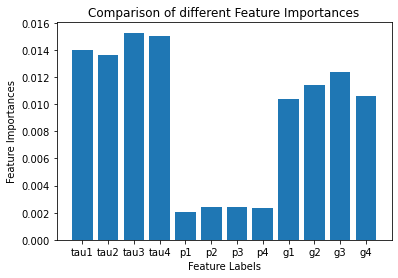

In [79]:
# Plotting a Bar Graph to compare the models 
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 